In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=sns.load_dataset("titanic")

In [29]:
df=pd.DataFrame(df)

In [30]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [31]:
df=df.drop(['deck','age'],axis=1)

In [32]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [33]:
df.dropna(inplace=True)

In [34]:
df.head(10)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   sibsp        889 non-null    int64   
 4   parch        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        889 non-null    object  
 12  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(5)
memory usage: 79.1+ KB


In [36]:
df.describe()

,survived,pclass,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681
std,0.486260,0.834700,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


In [37]:
print(df.duplicated().sum())

375


In [38]:
print(df.shape)

(889, 13)


In [39]:
df=df.drop_duplicates()

In [40]:
print(df.shape)

(514, 13)


In [41]:
print(pd.unique(df.values.ravel()))


[0 3 'male' 1 7.25 'S' 'Third' 'man' 'Southampton' 'no' 'female' 71.2833
 'C' 'First' 'woman' 'Cherbourg' 'yes' 7.925 53.1 8.05 8.4583 'Q'
 'Queenstown' 51.8625 21.075 'child' 2 11.1333 30.0708 'Second' 16.7 26.55
 5 31.275 7.8542 16.0 4 29.125 13.0 18.0 7.225 26.0 8.0292 35.5 31.3875
 263.0 7.8792 7.8958 27.7208 146.5208 7.75 10.5 82.1708 52.0 7.2292
 11.2417 9.475 21.0 41.5792 15.5 21.6792 17.8 39.6875 7.8 76.7292 61.9792
 27.75 46.9 83.475 27.9 15.2458 8.1583 8.6625 73.5 14.4542 56.4958 7.65
 29.0 12.475 9.0 9.5 7.7875 47.1 15.85 34.375 61.175 20.575 34.6542
 63.3583 23.0 77.2875 8.6542 7.775 24.15 9.825 14.4583 247.5208 7.1417
 22.3583 6.975 7.05 14.5 15.0458 26.2833 9.2167 79.2 6.75 11.5 36.75
 7.7958 12.525 66.6 7.3125 61.3792 7.7333 8 69.55 16.1 15.75 20.525 55.0
 25.925 33.5 30.6958 25.4667 28.7125 15.05 39.0 22.025 50.0 8.4042 6.4958
 10.4625 18.7875 31.0 113.275 27.0 76.2917 90.0 9.35 13.5 7.55 26.25
 12.275 7.125 52.5542 20.2125 86.5 512.3292 79.65 153.4625 135.6333 19.5
 29

In [42]:
from sklearn.preprocessing import LabelEncoder


In [43]:
label=LabelEncoder()

In [44]:

print(df.columns)

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')


In [45]:
df['sex']=label.fit_transform(df['sex'])

In [46]:
df['alive']=label.fit_transform(df['alive'])
df['alone']=label.fit_transform(df['alone'])

In [22]:
df['class']=label.fit_transform(df['class'])

In [47]:
print(df.head())

   survived  pclass  sex  sibsp  parch     fare embarked  class    who  \
0         0       3    1      1      0   7.2500        S  Third    man   
1         1       1    0      1      0  71.2833        C  First  woman   
2         1       3    0      0      0   7.9250        S  Third  woman   
3         1       1    0      1      0  53.1000        S  First  woman   
4         0       3    1      0      0   8.0500        S  Third    man   

   adult_male  embark_town  alive  alone  
0        True  Southampton      0      0  
1       False    Cherbourg      1      0  
2       False  Southampton      1      1  
3       False  Southampton      1      0  
4        True  Southampton      0      1  


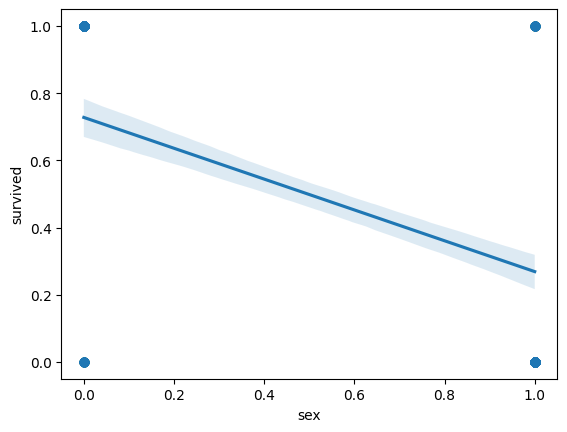

In [50]:
sns.regplot(x="sex",y="survived",data=df)
plt.show()

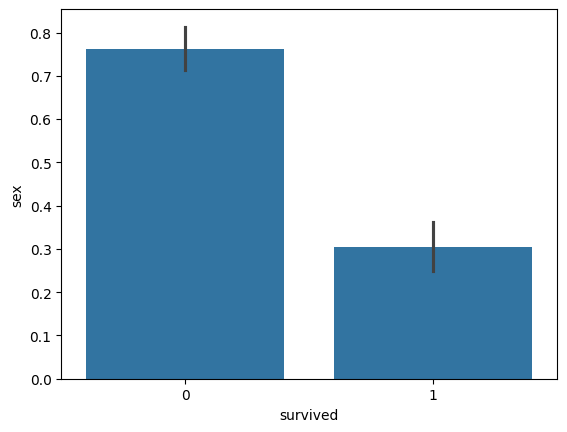

In [ ]:
sns.barplot(x='survived',y='sex',data=df)
plt.show()   #1 male and 0 female

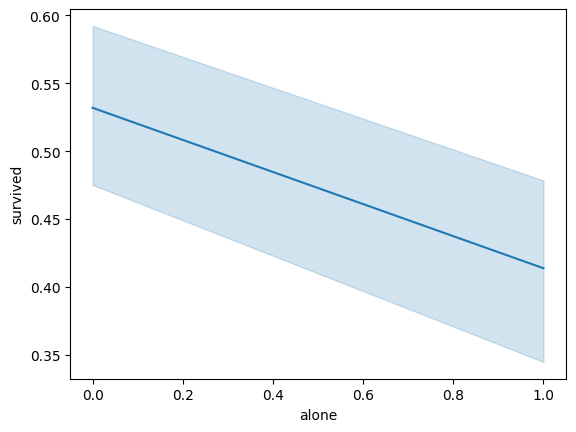

In [55]:
sns.lineplot(x='alone',y='survived',data=df)
plt.show()

<Axes: xlabel='alone', ylabel='survived'>

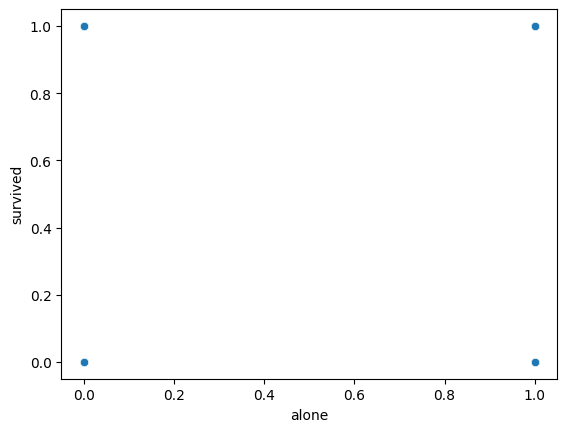

In [59]:
sns.scatterplot(x='alone',y='survived',data=df)

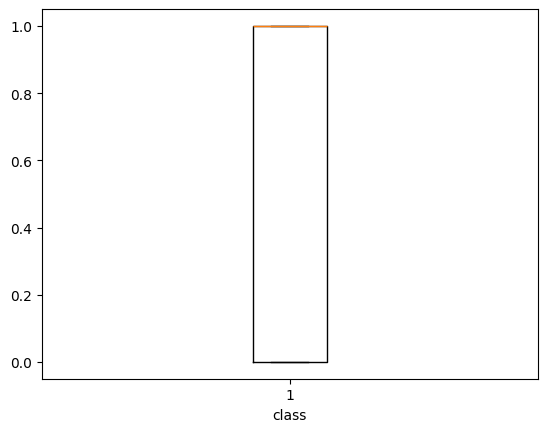

In [65]:
plt.boxplot(df['sex'].dropna())
plt.xlabel("class")
plt.show()


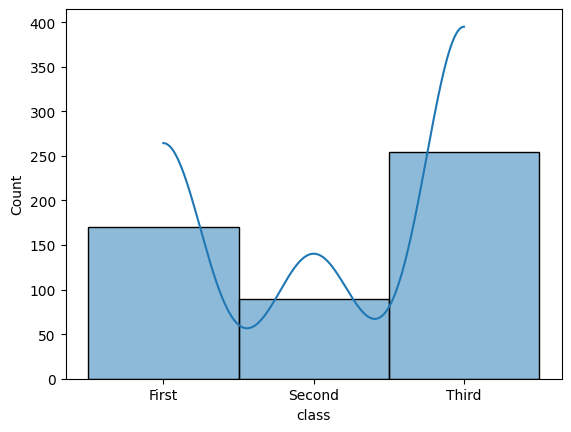

In [67]:
sns.histplot(df['class'],kde=True,bins=20)
plt.show()

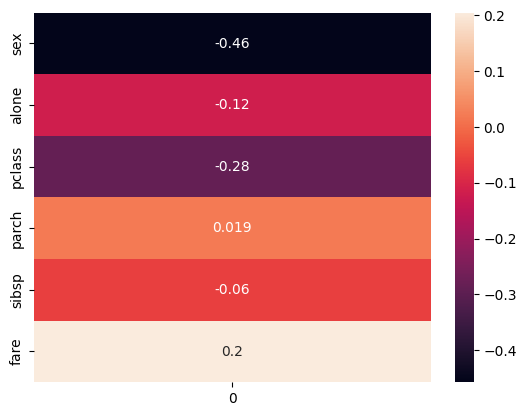

In [70]:
x=df[['sex','alone','pclass','parch','sibsp','fare']]
y=x.corrwith(df['survived'])
y= y.to_frame()
sns.heatmap(y,annot=True)
plt.show()